In [12]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.0 MB/s eta 0:00:00a 0:00:01


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
import os
notebook_path = os.path.abspath("data-training.ipynb")
features_path = os.path.join(os.path.dirname(notebook_path), "alt_acsincome_ca_features_85(1).csv")
labels_path = os.path.join(os.path.dirname(notebook_path), "alt_acsincome_ca_labels_85.csv")
features_path

'/mnt/d/5A/Apprentissage supervisé/supervised-learning/alt_acsincome_ca_features_85(1).csv'

In [15]:
try:
    # Read dataset
    df = pd.read_csv(features_path)
    dl = pd.read_csv(labels_path)
except FileNotFoundError as e:
    print(f"Error : {e}")

In [16]:
# Affichage des aperçus des données
print("\nAperçu des données (features) :")
print(df.head())
print("\nAperçu des données (labels) :")
print(dl.head())


Aperçu des données (features) :
   AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
0  41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0
1  77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0
2  38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0
3  30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0
4  36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0

Aperçu des données (labels) :
   PINCP
0   True
1   True
2  False
3   True
4  False


In [17]:
# Informations générales
print("\nInformations générales sur les données (features) :")
print(df.info())
print("\nInformations générales sur les données (labels) :")
print(dl.info())


Informations générales sur les données (features) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166315 entries, 0 to 166314
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AGEP    166315 non-null  float64
 1   COW     166315 non-null  float64
 2   SCHL    166315 non-null  float64
 3   MAR     166315 non-null  float64
 4   OCCP    166315 non-null  float64
 5   POBP    166315 non-null  float64
 6   RELP    166315 non-null  float64
 7   WKHP    166315 non-null  float64
 8   SEX     166315 non-null  float64
 9   RAC1P   166315 non-null  float64
dtypes: float64(10)
memory usage: 12.7 MB
None

Informations générales sur les données (labels) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166315 entries, 0 to 166314
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   PINCP   166315 non-null  bool 
dtypes: bool(1)
memory usage: 162.5 KB
None


In [9]:
# Statistiques descriptives
print("\nStatistiques descriptives (features) :")
print(df.describe())


Statistiques descriptives (features) :
                AGEP            COW           SCHL            MAR  \
count  166315.000000  166315.000000  166315.000000  166315.000000   
mean       42.736235       2.144551      18.470054       2.653633   
std        14.882790       1.888220       3.938362       1.846417   
min        17.000000       1.000000       1.000000       1.000000   
25%        30.000000       1.000000      16.000000       1.000000   
50%        42.000000       1.000000      19.000000       1.000000   
75%        55.000000       3.000000      21.000000       5.000000   
max        94.000000       8.000000      24.000000       5.000000   

                OCCP           POBP           RELP           WKHP  \
count  166315.000000  166315.000000  166315.000000  166315.000000   
mean     4019.729279      94.364718       2.506617      37.859255   
std      2638.167883     123.472067       4.443905      13.014087   
min        10.000000       1.000000       0.000000       1.000

In [10]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes dans les features :")
print(df.isnull().sum())
print("\nValeurs manquantes dans les labels :")
print(dl.isnull().sum())


Valeurs manquantes dans les features :
AGEP     0
COW      0
SCHL     0
MAR      0
OCCP     0
POBP     0
RELP     0
WKHP     0
SEX      0
RAC1P    0
dtype: int64


In [19]:
# Identifier les colonnes numériques
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nColonnes numériques à standardiser :")
print(numerical_columns)


Colonnes numériques à standardiser :
Index(['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX',
       'RAC1P'],
      dtype='object')


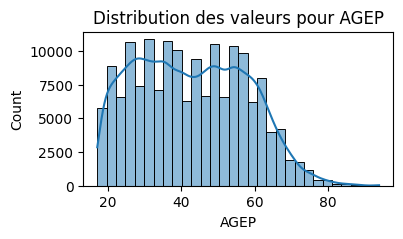

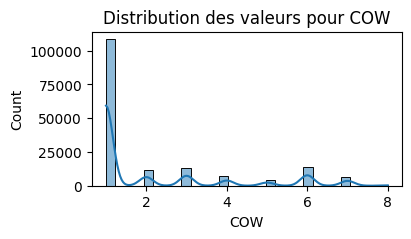

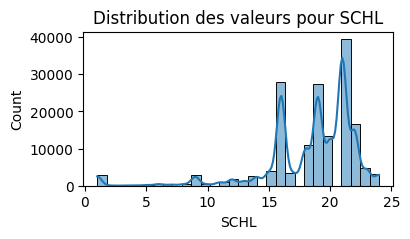

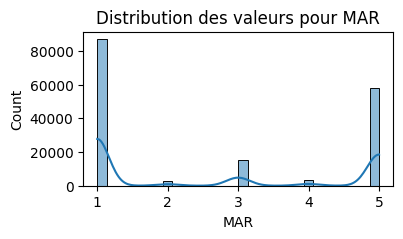

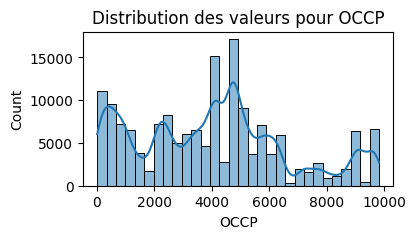

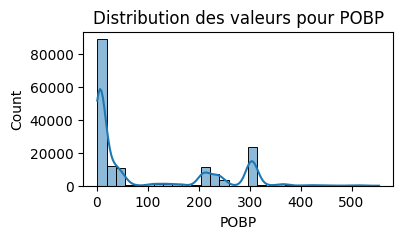

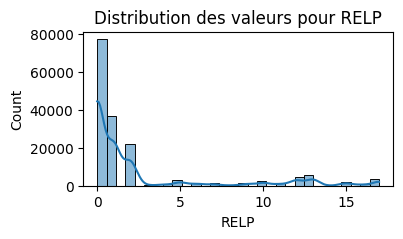

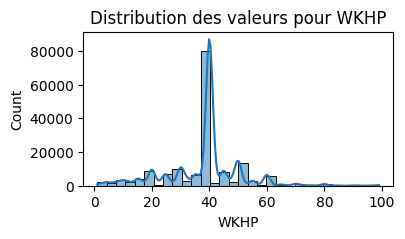

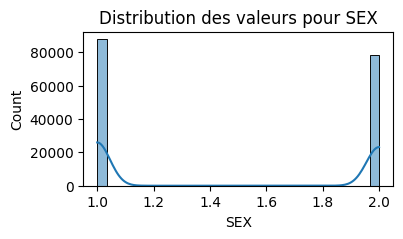

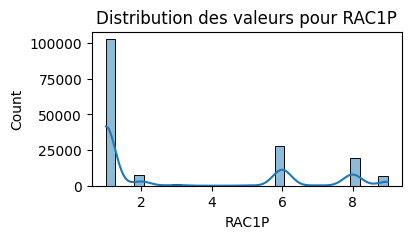

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution des valeurs pour {col}")
    plt.show()


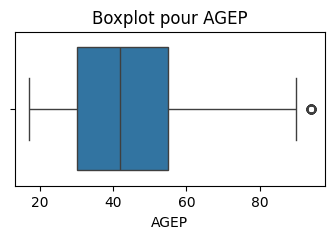

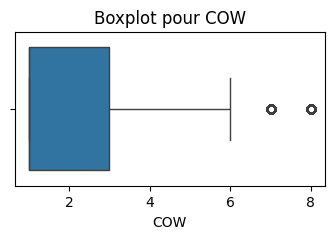

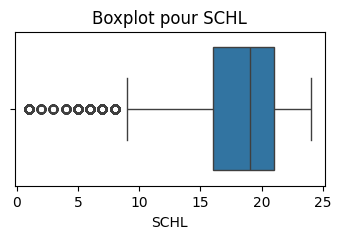

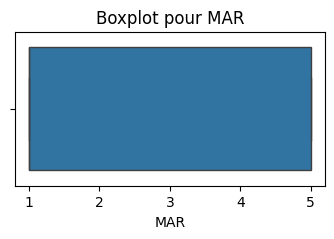

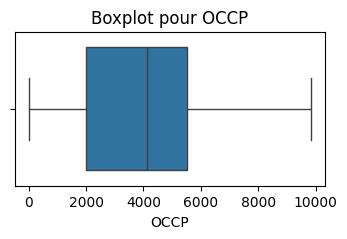

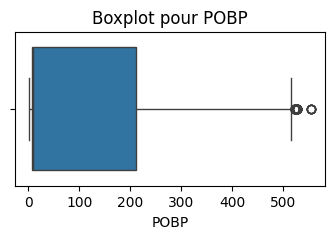

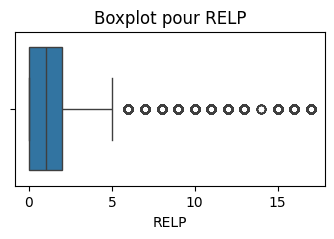

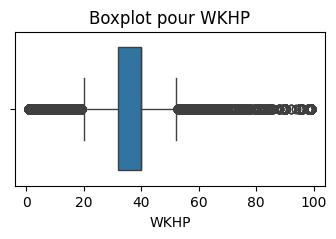

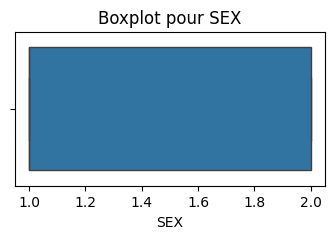

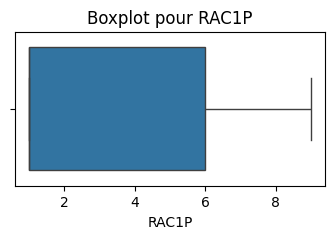

In [28]:
for col in numerical_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot pour {col}")
    plt.show()


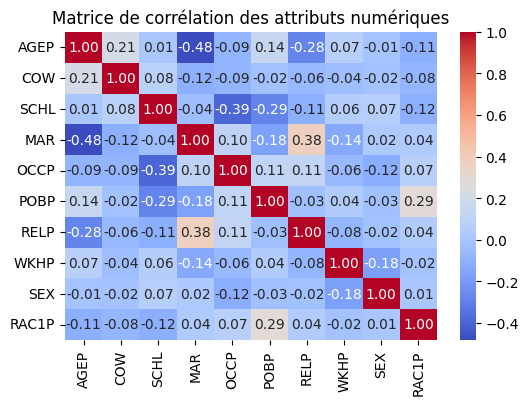

In [34]:
plt.figure(figsize=(6, 4))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des attributs numériques")
plt.show()

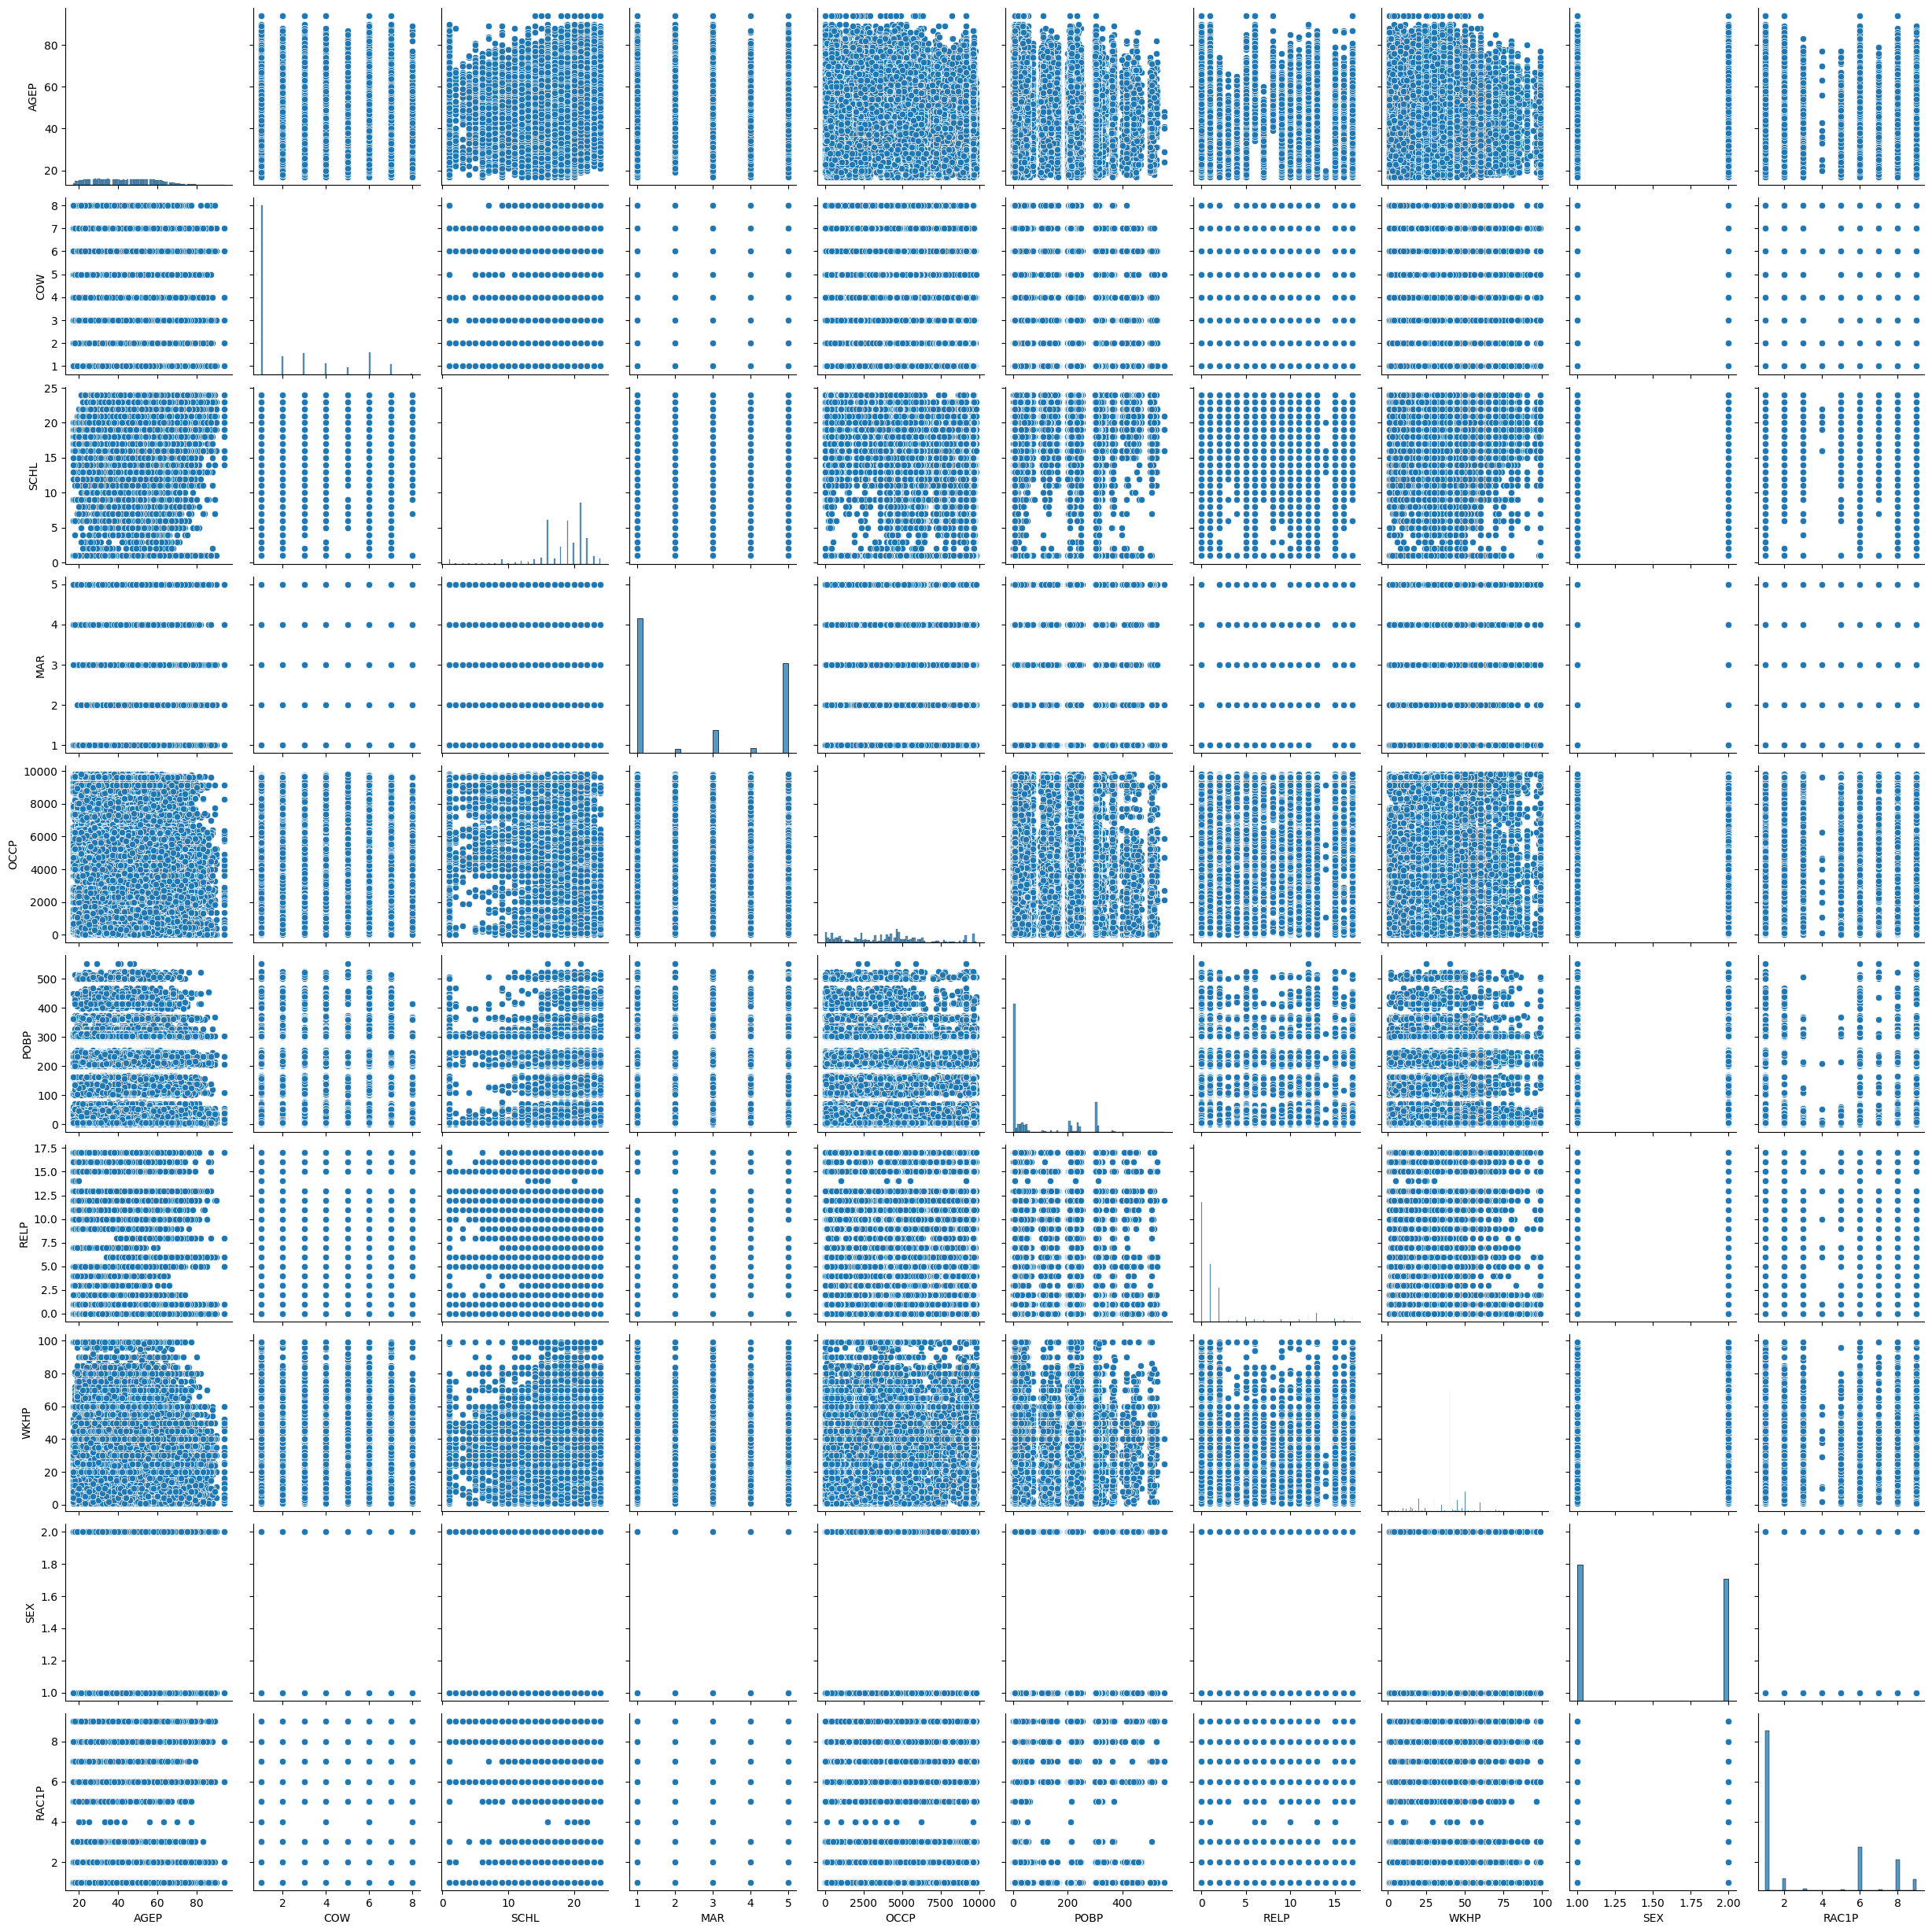

In [33]:
sns.pairplot(df[numerical_columns])
plt.show()


In [30]:
# Partitionner le jeu de données
# Associer les labels à `y` et les features à `X`
X = df.copy()  # Features
y = dl.iloc[:, 0]  # Cible (labels)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("\nPartitionnement réussi !")
print(f"Ensemble d'entraînement : {X_train.shape[0]} exemples")
print(f"Ensemble de test : {X_test.shape[0]} exemples")


Partitionnement réussi !
Ensemble d'entraînement : 133052 exemples
Ensemble de test : 33263 exemples


In [15]:
import joblib
# Standardiser les colonnes numériques
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Vérifier les données standardisées
print("\nAperçu des données standardisées (Ensemble d'entraînement) :")
print(X_train_scaled.head())

print("\nAperçu des données standardisées (Ensemble de test) :")
print(X_test_scaled.head())

# Sauvegarder le scaler pour réutilisation
scaler_file = 'scaler.pkl'
joblib.dump(scaler, scaler_file)
print(f"\nScaler sauvegardé dans le fichier '{scaler_file}'.")


Aperçu des données standardisées (Ensemble d'entraînement) :
            AGEP       COW      SCHL       MAR      OCCP      POBP      RELP  \
147072  0.823538 -0.605762 -1.635206  1.273122  2.155759  1.764190 -0.564431   
84322   0.420431  2.574810  0.389000 -0.894228  0.259318  1.237491 -0.339483   
129403 -1.662286 -0.605762 -0.623103  1.273122  0.001917 -0.715345 -0.114535   
20834  -1.595101 -0.605762  0.135974  1.273122 -0.422038 -0.334501  3.259683   
65348  -1.191995 -0.605762 -0.623103 -0.894228  1.432764  1.691262 -0.339483   

            WKHP       SEX     RAC1P  
147072  0.161370 -0.946574  1.693785  
84322   1.083153 -0.946574  1.007326  
129403 -0.990859 -0.946574 -0.365593  
20834  -0.990859  1.056441 -0.708823  
65348   0.161370 -0.946574  1.693785  

Aperçu des données standardisées (Ensemble de test) :
            AGEP       COW      SCHL       MAR      OCCP      POBP      RELP  \
21546   0.017325  0.454429  1.148077 -0.894228 -0.649157  1.294213 -0.339483   
116870  

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Modèles par défaut
models = {
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm="SAMME"),
    'GradientBoosting': GradientBoostingClassifier()
}

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Generating classification_report, confusion_matrix
for name, model in models.items():
    # Training Model
    model.fit(X_train_scaled, y_train)
    
    # Predict Test Set
    y_pred = model.predict(X_test_scaled)
    
    # Printing classification_report
    print(f'\n{name} - Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Printing confusion_matrix
    print(f'{name} - Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))



RandomForest - Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     19594
        True       0.78      0.77      0.77     13669

    accuracy                           0.81     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.81      0.81      0.81     33263

RandomForest - Confusion Matrix:
[[16648  2946]
 [ 3212 10457]]

AdaBoost - Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.85      0.84     19594
        True       0.77      0.74      0.76     13669

    accuracy                           0.80     33263
   macro avg       0.80      0.79      0.80     33263
weighted avg       0.80      0.80      0.80     33263

AdaBoost - Confusion Matrix:
[[16600  2994]
 [ 3552 10117]]

GradientBoosting - Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     19